In [2]:
# Load your data
df = pd.read_csv('text_dataset.csv')

df.head()

,label,cleaned_text,cleaned_subject,cleaned_title,token_count
0,1,donald trump met member nato go well moment ar...,news,watch trump shove foreign leader way get front...,71
1,0,washington reuters rick perry presidentelect d...,politicsnews,trump energy pick perry softens stance climate...,128
2,1,president obama blasted republican presidentia...,politics,obama finally build border wallbut there one p...,81
3,1,male idaho republican five daughter made creep...,news,republican lawmaker say rape wont cause pregna...,82
4,1,kellyanne conway tried spin white house press ...,news,watch chuck todd swat annoying kellyanne conwa...,75


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Load your data
df = pd.read_csv('text_dataset.csv')

# Assume you have columns named 'text' for the text data and 'label' for the labels
X = df['cleaned_text']  # Replace 'text' with the actual column name containing text data
y = df['label']  # Replace 'label' with the actual column name for labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that includes vectorization and the classifier
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB())
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9584387423202024
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1353
           1       0.97      0.95      0.96      1414

    accuracy                           0.96      2767
   macro avg       0.96      0.96      0.96      2767
weighted avg       0.96      0.96      0.96      2767



In [6]:
# Load your data
df = pd.read_csv('features_dataset.csv')

df.head()

,label,TTR,text_polarity,text_subjectivity,title_polarity,title_subjectivity,doc_perplexity,1_grams,average_word_length
0,1,0.844037,0.091481,0.524184,-0.125,0.125,0.867938,"['donald', 'trump', 'met', 'member', 'nato', '...",6.490826
1,0,0.683438,0.003001,0.343395,0.000,0.000,0.882860,"['washington', 'reuters', 'rick', 'perry', 'pr...",6.385744
2,1,0.721030,0.073622,0.401345,0.000,1.000,0.883760,"['president', 'obama', 'blasted', 'republican'...",6.072961
3,1,0.667638,0.037264,0.462935,0.000,1.000,0.882882,"['male', 'idaho', 'republican', 'daughter', 'c...",6.469388
4,1,0.628032,-0.018966,0.479310,-0.800,0.900,0.883120,"['kellyanne', 'conway', 'tried', 'spin', 'whit...",6.296496


In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv('features_dataset.csv')  # Adjust path as necessary

# Print data types for each column
print(df.dtypes)

label                    int64
TTR                    float64
text_polarity          float64
text_subjectivity      float64
title_polarity         float64
title_subjectivity     float64
doc_perplexity         float64
1_grams                 object
average_word_length    float64
dtype: object


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the vectorizer
vectorizer = CountVectorizer()

# Vectorize the text data directly
X_vectorized = vectorizer.fit_transform(df['1_grams'])

# Assuming you have other numeric features that need to be included
# Drop the non-numeric column and convert DataFrame to a sparse DataFrame to concatenate with X_vectorized
df_dropped = df.drop('1_grams', axis=1).astype(float)  # Convert other columns to float
from scipy.sparse import csr_matrix, hstack
df_dropped_sparse = csr_matrix(df_dropped.values)  # Convert DataFrame to sparse matrix
X_final = hstack([df_dropped_sparse, X_vectorized])  # Concatenate the matrices

# Proceed with your model training using X_final


In [16]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import csr_matrix, hstack
import ast

# Load your dataset
df = pd.read_csv('features_dataset.csv')  # Adjust path as necessary

# Safe evaluation and conversion function for string representations of lists
def safe_eval(x):
    try:
        return ' '.join(ast.literal_eval(x))
    except:
        return x  # return the original string if conversion fails

# Apply conversion to the '1_grams' column
df['1_grams'] = df['1_grams'].apply(safe_eval)

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Vectorize the text data
X_vectorized = vectorizer.fit_transform(df['1_grams'])

# Assuming you have other numeric features that need to be included
df_dropped = df.drop('1_grams', axis=1).astype(float)  # Convert other columns to float
df_dropped_sparse = csr_matrix(df_dropped.values)  # Convert DataFrame to sparse matrix

# Concatenate the matrices
X_final = hstack([df_dropped_sparse, X_vectorized])

# Assuming the label column is named 'label'
y = df['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)


In [20]:
X_final

<13834x134131 sparse matrix of type '<class 'numpy.float64'>'
	with 3462866 stored elements in Compressed Sparse Row format>

In [22]:
import pandas as pd

# Load the dataset
df = pd.read_csv('features_dataset.csv')  # Adjust the path as necessary

# Function to safely convert columns to numeric and check for negative values
def check_negatives(dataframe):
    negative_counts = {}
    for column in dataframe.columns:
        # Convert column to numeric, non-convertible values become NaN
        converted_column = pd.to_numeric(dataframe[column], errors='coerce')
        # Count negative values
        count = (converted_column < 0).sum()
        if count > 0:
            negative_counts[column] = count
    return negative_counts

# Apply the function to your DataFrame
negative_columns = check_negatives(df)

# Print the columns with negative values and their counts
print("Columns with negative values and their counts:")
for column, count in negative_columns.items():
    print(f"{column}: {count} negatives")


Columns with negative values and their counts:
text_polarity: 3097 negatives
title_polarity: 3117 negatives


In [23]:
def check_negatives_exclude_non_numeric(dataframe):
    negative_counts = {}
    for column in dataframe.columns:
        # Attempt to convert column to numeric
        converted_column = pd.to_numeric(dataframe[column], errors='coerce')
        # Continue only if the column is numeric
        if converted_column.dtype != 'object':
            # Count negative values
            count = (converted_column < 0).sum()
            if count > 0:
                negative_counts[column] = count
    return negative_counts


In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load the dataset
df = pd.read_csv('features_dataset.csv')  # Adjust the path as necessary

# Convert all columns to numeric, handling non-numeric gracefully
df = df.apply(pd.to_numeric, errors='coerce')

# Fill NaN values that result from conversion errors
df.fillna(0, inplace=True)

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data to scale each feature to [0, 1] range
df_scaled = scaler.fit_transform(df.drop('label', axis=1))

# Split the data into features and target
X = df_scaled
y = df['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multinomial Naive Bayes classifier
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.6176364293458619
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.71      0.64      1353
           1       0.65      0.53      0.59      1414

    accuracy                           0.62      2767
   macro avg       0.62      0.62      0.62      2767
weighted avg       0.62      0.62      0.62      2767



In [26]:
from sklearn.model_selection import GridSearchCV

# Parameters grid to search
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')

# Fit it to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters: {'alpha': 10}
Best cross-validation score: 0.63


In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and you have already vectorized your features into X and extracted y

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier with the best parameters found
best_alpha = grid_search.best_params_['alpha']
model = MultinomialNB(alpha=best_alpha)

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_mat)
print("Classification Report:\n", report)


Accuracy: 0.6176364293458619
Confusion Matrix:
 [[954 399]
 [659 755]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.71      0.64      1353
           1       0.65      0.53      0.59      1414

    accuracy                           0.62      2767
   macro avg       0.62      0.62      0.62      2767
weighted avg       0.62      0.62      0.62      2767



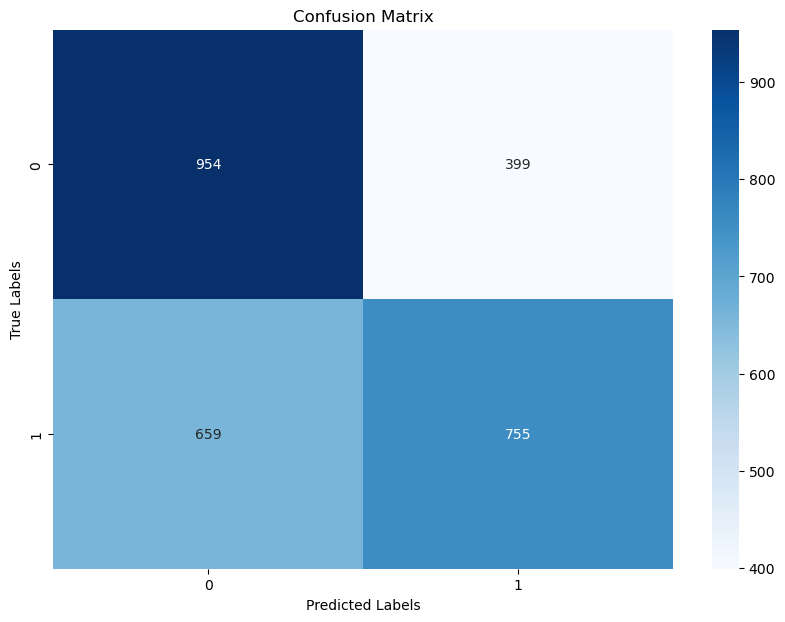

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()